Predicting Heart Disease:
In this project, we will identify the major cause of heart disease and the probability of new patient having heart disease.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('/content/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
num_observations, num_features = df.shape

# Print the results
print(f"Number of observations: {num_observations}")
print(f"Number of features: {num_features}")

Number of observations: 918
Number of features: 12


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.dtypes


,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [7]:
df.shape


(918, 12)

Based on the descriptive statistics, here are some of the observations that we can make:
# New Section
    The average age of patients is ~53 years.
    The median for Cholesterol is higher than its mean by roughly 25 mm/dl, indicating that it could be a left-skewed distribution with a possibility of outliers skewing the distribution.
    RestingBP and Cholesterol have a minimum value of zero.
    There don't seem to be any missing values in these columns.
    A couple of observations stand out. RestingBP is the resting blood pressure, and it's unlikely to be zero. But what about Cholesterol? Low cholesterol certainly sounds like a good thing, but can it be zero?

    This is where domain expertise can help us. Since we might not be suited to answer the question, we could reach out to a subject matter expert or research it on our own.

In [8]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


Sex
M    725
F    193
Name: count, dtype: int64


<BarContainer object of 2 artists>

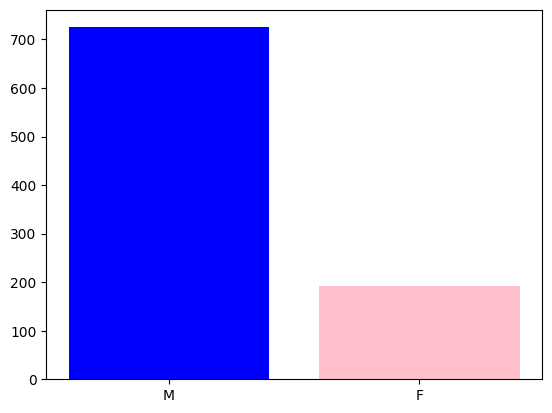

In [9]:
gender_count=df['Sex'].value_counts()
print(gender_count)
plt.bar(gender_count.index, gender_count.values, color=['blue', 'pink'])

<ipython-input-10-9278865dc13b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


<Figure size 1500x1000 with 0 Axes>

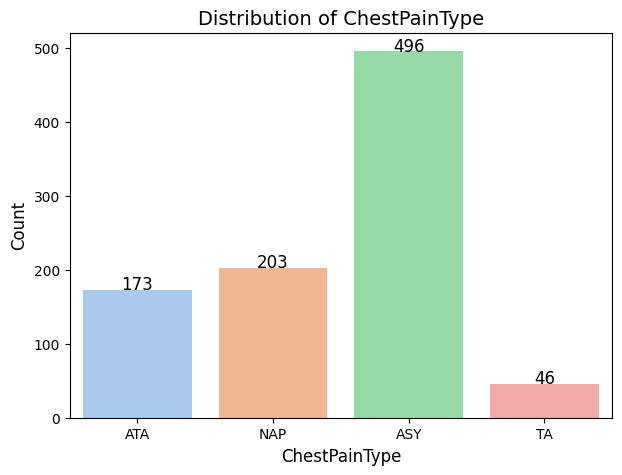

<ipython-input-10-9278865dc13b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


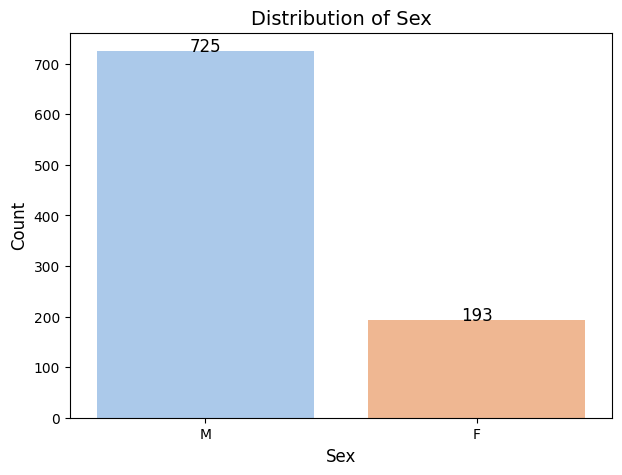

<ipython-input-10-9278865dc13b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


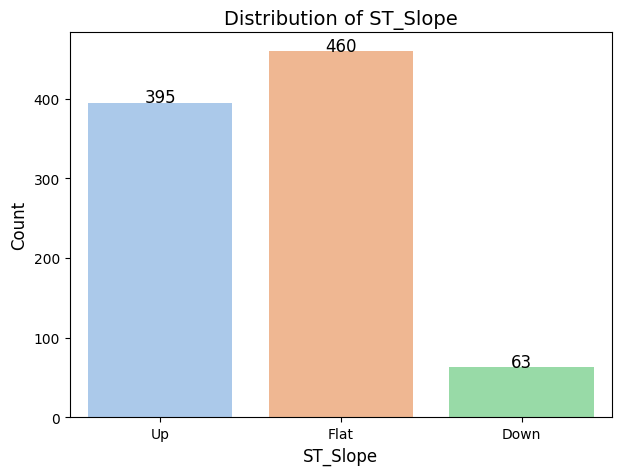

<ipython-input-10-9278865dc13b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


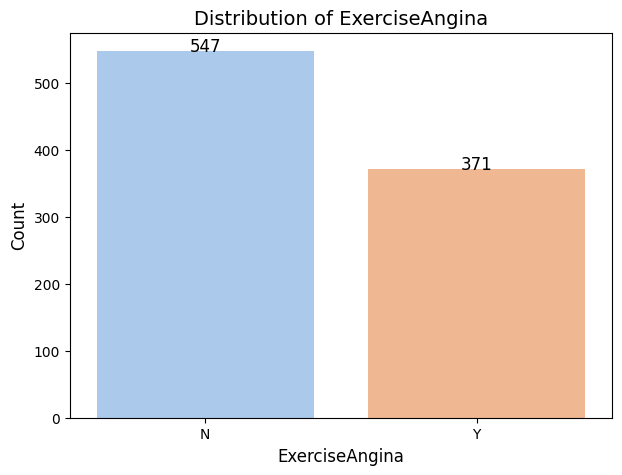

<ipython-input-10-9278865dc13b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


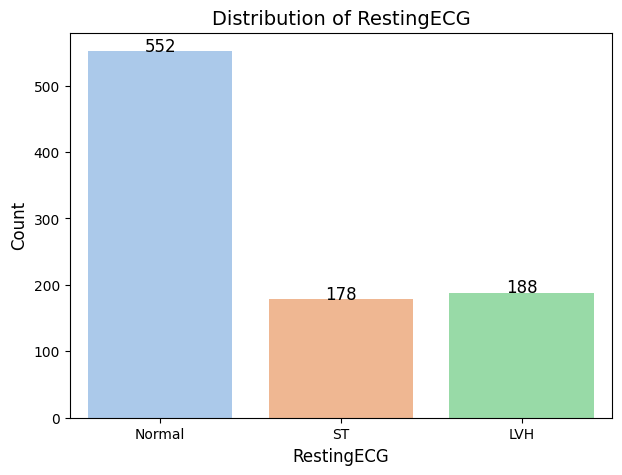

<ipython-input-10-9278865dc13b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


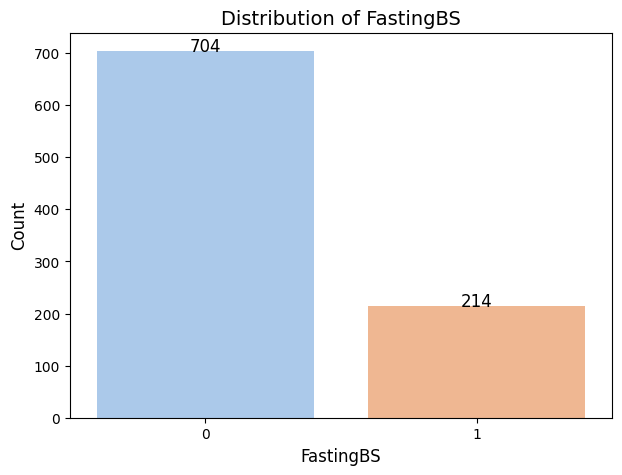

<ipython-input-10-9278865dc13b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


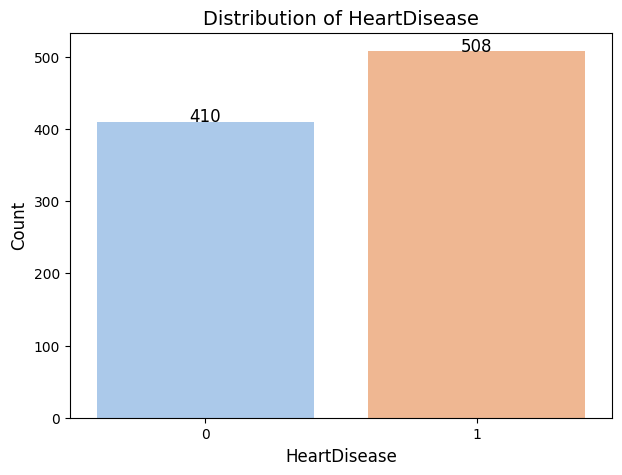

In [10]:
import seaborn as sns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# If HeartDisease and FastingBS are numeric but categorical in nature, include them
categorical_columns.extend(['HeartDisease', 'FastingBS'])
categorical_columns = list(set(categorical_columns))
plt.figure(figsize=(15, 10))

# Loop through each categorical column and plot a bar chart
for i, col in enumerate(categorical_columns):
    plt.figure(figsize=(7, 5))
    sns.countplot(data=df, x=col, palette="pastel")

    # Add labels and title
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.title(f"Distribution of {col}", fontsize=14)

    # Display count labels on bars
    for p in plt.gca().patches:
        plt.gca().annotate(f'{int(p.get_height())}',
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='baseline', fontsize=12, color='black')

    # Show the plot
    plt.show()

In [11]:
categorical_columns

['ChestPainType',
 'Sex',
 'ST_Slope',
 'ExerciseAngina',
 'RestingECG',
 'FastingBS',
 'HeartDisease']

In [12]:
categorical_columns.remove('HeartDisease')
categorical_columns

['ChestPainType',
 'Sex',
 'ST_Slope',
 'ExerciseAngina',
 'RestingECG',
 'FastingBS']

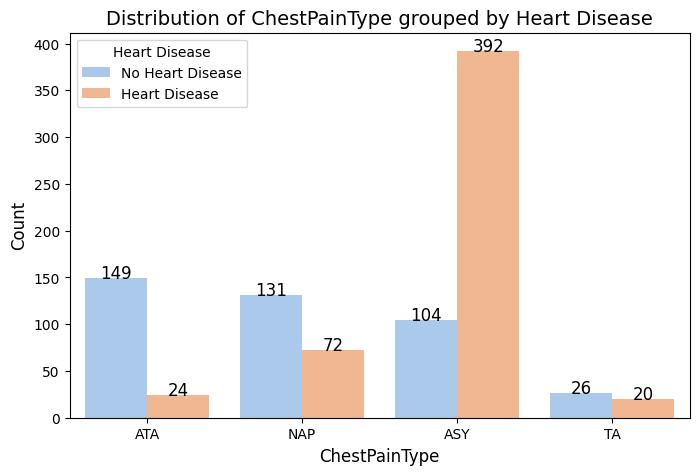

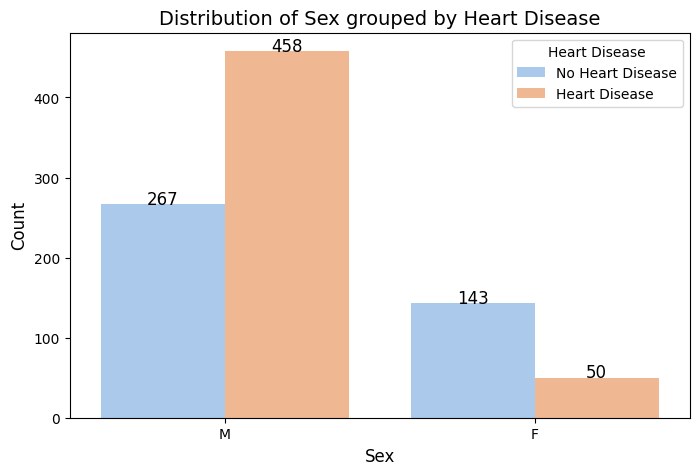

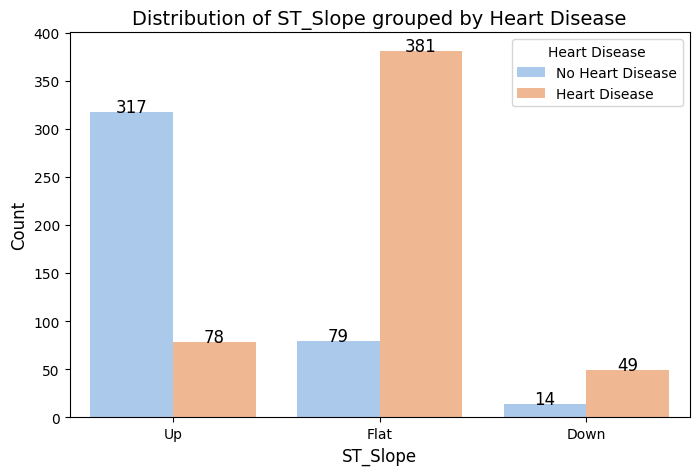

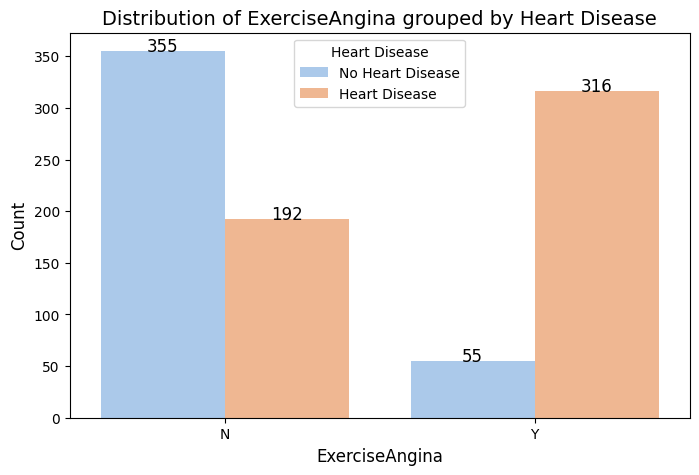

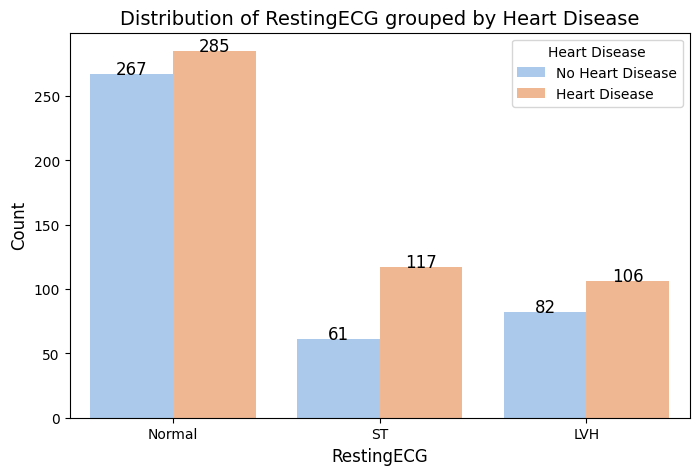

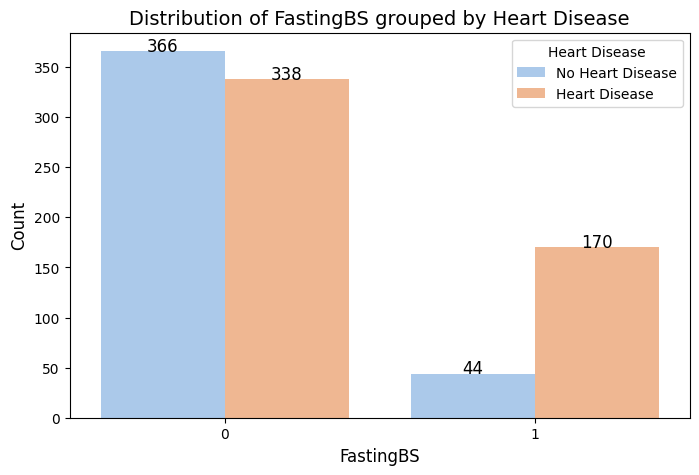

In [13]:
# Loop through categorical columns and create grouped bar charts
for col in categorical_columns:
    plt.figure(figsize=(8, 5))

    # Create count plot grouped by HeartDisease
    ax = sns.countplot(data=df, x=col, hue='HeartDisease', palette='pastel')

    # Add labels and title
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.title(f"Distribution of {col} grouped by Heart Disease", fontsize=14)

    # Add count labels to each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='baseline', fontsize=12, color='black')

    # Add legend
    plt.legend(title="Heart Disease", labels=["No Heart Disease", "Heart Disease"])

    # Show the plot
    plt.show()